In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
img1 = cv2.imread("images/chessboard_01.jpg")
img2 = cv2.imread("images/chessboard_02.jpg")

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

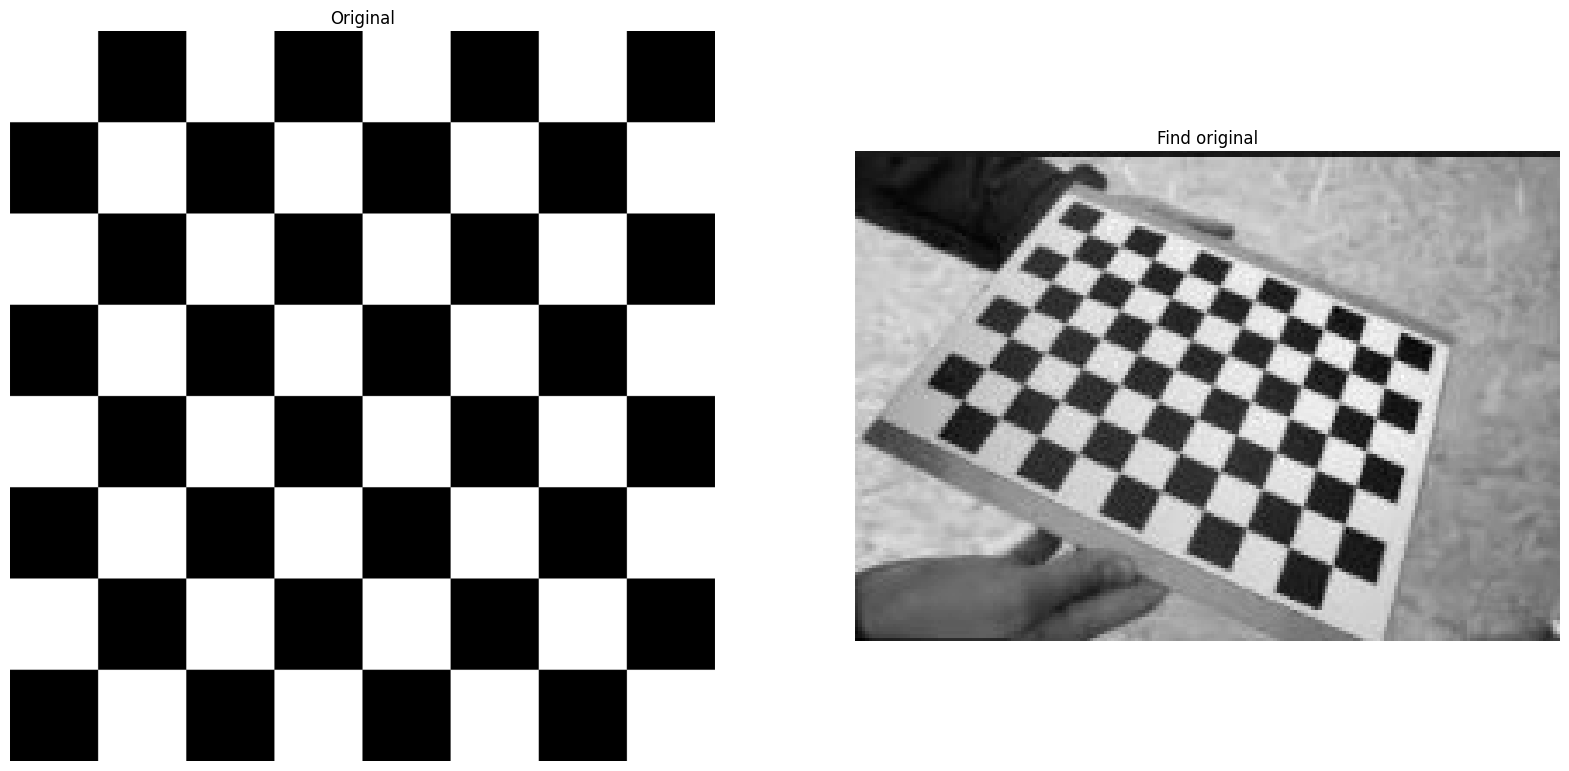

In [8]:
fx, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].set_title("Original")
ax[0].imshow(img1_gray, cmap="gray")
ax[0].axis("off")

ax[1].set_title("Find original")
ax[1].imshow(img2_gray, cmap="gray")
ax[1].axis("off")
plt.show()

In [9]:
sift = cv2.SIFT_create()

# find the keypoints with SIFT
kp = sift.detect(img1_gray, None)

# compute the descriptors with SIFT
kp, des = sift.compute(img1_gray, kp)


fkp = sift.detect(img2_gray, None)

# compute the descriptors with ORB
fkp, fdes = sift.compute(img2_gray, fkp)

In [10]:
# create a Brute Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors.
matches = bf.match(des, fdes)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

In [11]:
if len(matches)>10:
    src_pts = np.float32([ kp[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ fkp[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2_gray,[np.int32(dst)],True,255,3, cv2.LINE_AA)

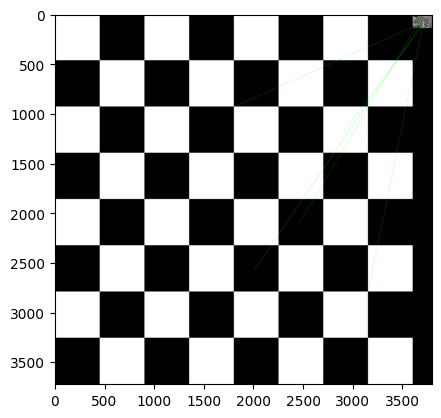

(<matplotlib.image.AxesImage at 0x7f42792490a0>, None)

In [12]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp,img2,fkp,matches,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()